In [1]:
! pip install numpy matplotlib opencv-python scikit-learn tensorflow

In [2]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2

In [3]:
# Load LFW dataset (only those with at least 20 images)
lfw = fetch_lfw_people(min_faces_per_person=20, resize=0.5)
print("Classes:", lfw.target_names)
print("Data shape:", lfw.images.shape)

Classes: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods'

In [4]:
person_name = 'George W Bush'  # Target person
target_idx = np.where(lfw.target_names == person_name)[0][0]

In [5]:
# Create binary labels
y_binary = (lfw.target == target_idx).astype(np.int32)

In [6]:
X = lfw.images
X = X / 255.0  # Normalize
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 45, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       573,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,385 (2.26 MB)

 Trainable params: 592,385 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.7915 - loss: 0.5289 - val_accuracy: 0.8397 - val_loss: 0.4534
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8119 - loss: 0.4887 - val_accuracy: 0.8397 - val_loss: 0.4405
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.8064 - loss: 0.4974 - val_accuracy: 0.8397 - val_loss: 0.4403
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.8280 - loss: 0.4646 - val_accuracy: 0.8397 - val_loss: 0.4462
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 18s 102ms/step - accuracy: 0.8201 - loss: 0.4730 - val_accuracy: 0.8397 - val_loss: 0.4406
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.8228 - loss: 0.4699 - val_accuracy: 0.8397 - val_loss: 0.4414
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.8310 - loss: 0.4560 - val_accuracy: 0.8397 - val_loss: 0.4474
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.8122 - loss: 0.4862 - val_accuracy:

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8414 - loss: 0.4392
Test Accuracy: 83.97%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


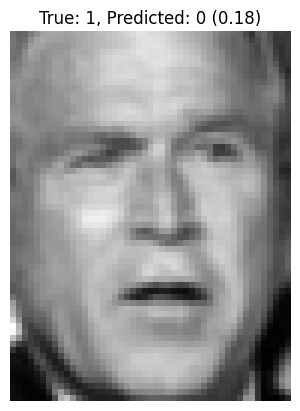

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly select one test image
idx = np.random.randint(0, X_test.shape[0])
sample_image = X_test[idx]
true_label = y_test[idx]

# Predict
prediction = model.predict(sample_image.reshape(1, X.shape[1], X.shape[2], 1))[0][0]
predicted_label = 1 if prediction >= 0.5 else 0

# Display
plt.imshow(sample_image.reshape(X.shape[1], X.shape[2]), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label} ({prediction:.2f})")
plt.axis('off')
plt.show()
